# The Spark Foundation -  Graduate Rotational Internship Program
## Data science and Business Analytics
## Batch - November 2021 
## Author : Praveen Titus F
## Task - 3 : Exploratory data analysis - Retail
### Dataset : https://bit.ly/3i4rbWl
### Problem : To find the weak areas to make profit.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the csv dataset
df = pd.read_csv("SampleSuperstore.csv")

### Understanding the data for analysis

In [3]:
# To view all the columns and first 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# To view last 5 rows of the dataset
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# To find the no of row and no of columns in the dataset
df.shape

(9994, 13)

#### Dataset has 9994 rows and 13 columns 

In [6]:
# To find the null values , data type and total observation in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### This dataset has no null values in any of the columns

In [7]:
# To view the names of the columns in the dataset 
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
# To find no of unique values in each columns  
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
# To get an overview of columns with numerical values statistically
df1 = df[['Sales','Quantity','Discount','Profit' ]]
df1.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# To view the details of columns with categorical varaiables
df.describe(include = 'object' )

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


###  Visualization the data for analysis

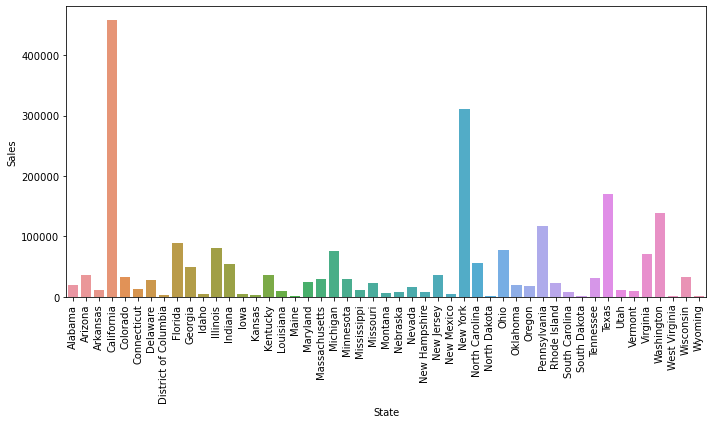

In [11]:
# Graphically representing the state wise sales using barplot
sts=df[["State", "Sales"]].groupby(['State'], as_index=False).sum().sort_values(by='State', ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', data=sts)
plt.xticks(rotation=90)
plt.tight_layout()

#### States such as California, New York, Texas,  Washington and Pennsylvania have high sales

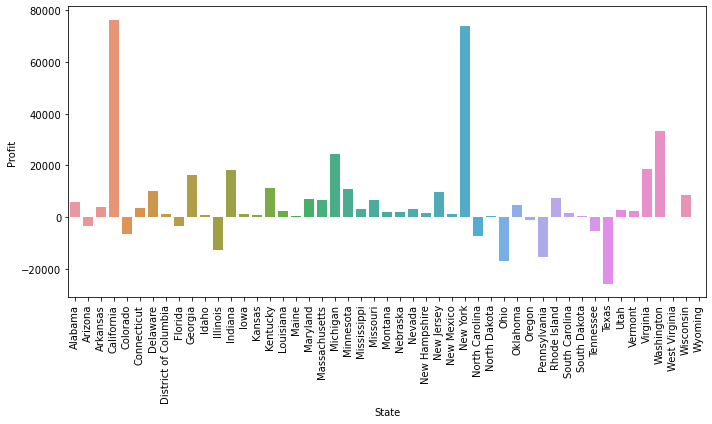

In [12]:
# Graphically representing the state wise profit and loss
stp=df[["State", "Profit"]].groupby(['State'], as_index=False).sum().sort_values(by='State', ascending = True)
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Profit', data=stp)
plt.xticks(rotation=90)
plt.tight_layout()

#### States with high sales have high Profits.  And states with low sales have losses

<AxesSubplot:>

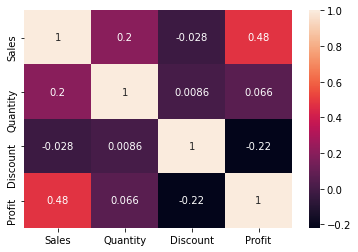

In [13]:
# To find the correlation between different numerical variables 
df2 = df[['Sales','Quantity','Discount','Profit' ]].corr()
sns.heatmap(df2, annot = True)

#### From correlation heatmap only sales and profit has good positive relationship
#### So high sales gives high profit